<img  src="https://media.mehrnews.com/d/2019/07/31/4/3194094.jpg">

# Data Visualization

### Import the necessary libraries

In [5]:
import pandas as pd
import src.limpieza_texto as lt
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy
import src.visualizacion as vt

### Import the dateframe

In [6]:
shrk = pd.read_csv("data/midatasetlimpio.csv")

In [7]:
shrk.tail(3)

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
6299,6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6300,6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...
6301,6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,http://sharkattackfile.net/spreadsheets/pdf_di...


## Preliminary conclusions

### Risk of death

In [8]:
death=lt.df_filtered_best(shrk, "Fatal (Y/N)", 2)


In [9]:
sex=lt.df_filtered_best(shrk, "Sex ", 2)
sex_2 = lt.df_filtered_best(sex, "Fatal (Y/N)", 2)
#sex_3 = lt.df_filtered_best(shrk, "Sex ", 1)
#sex_4 =  lt.df_filtered_best(sex_3, "Fatal (Y/N)", 2)
mujeres = shrk[shrk["Sex "] == "F"]
mujeres =  lt.df_filtered_best(mujeres, "Fatal (Y/N)", 2)
mujeres["Fatal (Y/N)"].value_counts(1)
hombres = shrk[shrk["Sex "] == "M"]
hombres =  lt.df_filtered_best(hombres, "Fatal (Y/N)", 2)
hombres["Fatal (Y/N)"].value_counts(1)

N    0.74774
Y    0.25226
Name: Fatal (Y/N), dtype: float64

The chance of dying: 24.0%


<AxesSubplot:xlabel='Fatal (Y/N)', ylabel='count'>

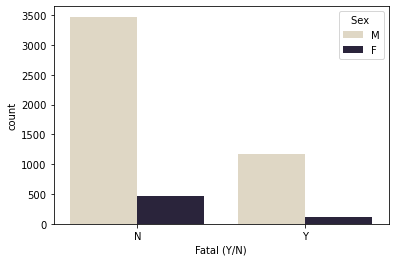

In [10]:
riesgo_muerte = sns.countplot(x=sex_2["Fatal (Y/N)"], hue = sex_2["Sex "], palette="ch:s=-.2,r=.6")

por_muertes=shrk["Fatal (Y/N)"].value_counts(1)
muerte_h = hombres["Fatal (Y/N)"].value_counts(1)
muerte_m = mujeres["Fatal (Y/N)"].value_counts(1)

print(f"The chance of dying: {por_muertes[1].round(2)*100}%")
riesgo_muerte

In [11]:
vt.guarda_grafico(riesgo_muerte, "images/riesgo_muerto.svg")

Women risk of death: 19.0%


<AxesSubplot:xlabel='Fatal (Y/N)', ylabel='count'>

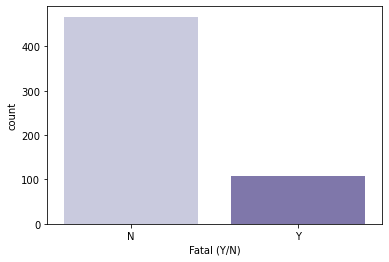

In [12]:
muerte_mujeres = sns.countplot(x=mujeres["Fatal (Y/N)"], palette="Purples")
vt.guarda_grafico(muerte_mujeres, "images/muerte_mujeres.svg")
print(f"Women risk of death: {muerte_m[1].round(2)*100}%")
muerte_mujeres

TypeError: 'AxesSubplot' object is not subscriptable

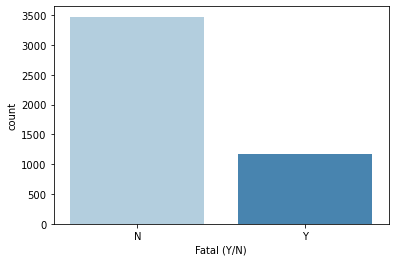

In [13]:
muerte_h = sns.countplot(x=hombres["Fatal (Y/N)"], palette="Blues")
vt.guarda_grafico(muerte_h,"images/muerte_h.svg")
print(f"Men risk of death: {muerte_h[1].round(2)*100}%")
muerte_h

#### The chance of dying after a shark attack is 24% and is more dangerous for men (25%) than for woman (19%).

In [115]:
edad = lt.df_filtered_best(death, "Age", 55)
#edad["Age"].astype(int)

#edad["Age"].mean()

#edad = sns.histplot(y=edad.Age, hue=edad["Fatal (Y/N)"])
#edad.describe()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

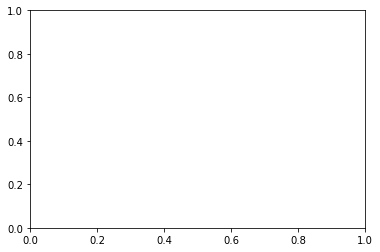

In [234]:
shrk.Country.value_counts(1)

USA                 0.356526
AUSTRALIA           0.214012
SOUTH AFRICA        0.092610
PAPUA NEW GUINEA    0.021433
NEW ZEALAND         0.020473
                      ...   
PARAGUAY            0.000160
KUWAIT              0.000160
PUERTO RICO         0.000160
RED SEA?            0.000160
ARUBA               0.000160
Name: Country, Length: 212, dtype: float64

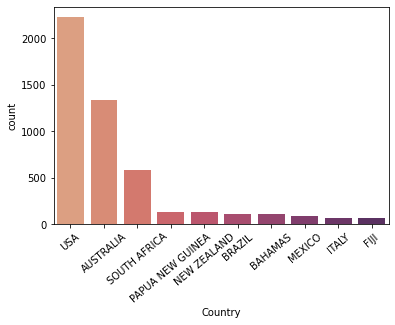

In [233]:
pais = lt.df_filtered_best(shrk, "Country", 10)
pais_m=sns.countplot(x=pais.Country, palette="flare")
vt.rotar_labels(pais_m, 40)
vt.guarda_grafico(pais_m, "images/pais_m.svg")

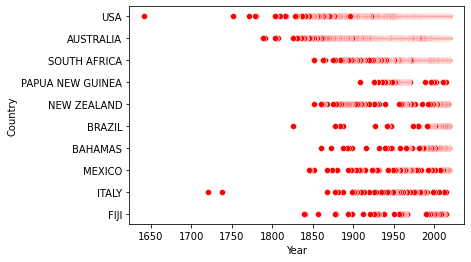

In [239]:
pais_a = pais[pais["Year"]>1200]
pais_an=sns.scatterplot(x=pais_a.Year, y=pais_a.Country, color="red")
vt.guarda_grafico(pais_an,"images/pais_an.svg")

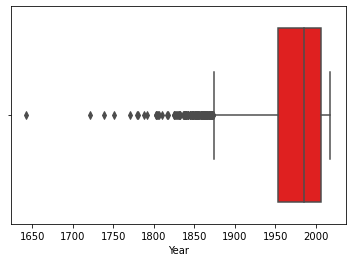

In [249]:
box_a = sns.boxplot(x=pais_a.Year, color="red")
vt.guarda_grafico(box_a, "images/box_a.svg")

## Most dangerous species


In [14]:
tib = shrk["Species "].value_counts(1)
tib[:15]

White shark                                           0.047055
Shark involvement prior to death was not confirmed    0.030312
Invalid                                               0.029446
Shark involvement not confirmed                       0.025404
Tiger shark                                           0.021074
Shark involvement prior to death unconfirmed          0.019630
Bull shark                                            0.015012
4' shark                                              0.011547
6' shark                                              0.011547
1.8 m [6'] shark                                      0.010104
Questionable incident                                 0.010104
Questionable                                          0.009815
1.5 m [5'] shark                                      0.009238
1.2 m [4'] shark                                      0.007794
3' shark                                              0.007506
Name: Species , dtype: float64

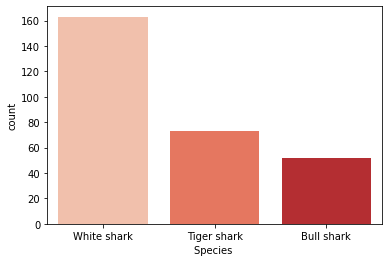

In [15]:
w = shrk[shrk["Species "] == "White shark"]
t = shrk[shrk["Species "] == "Tiger shark"]
b = shrk[shrk["Species "] == "Bull shark"]
especies = pd.concat([w,t,b])
especies_p = sns.countplot(x=especies["Species "], palette="Reds")
vt.guarda_grafico(especies_p, "images/especies_p.svg")


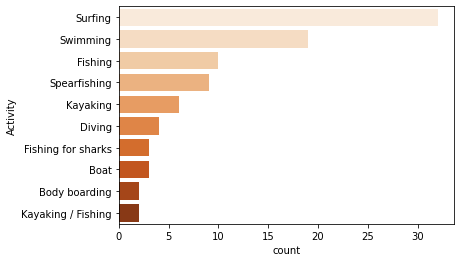

In [16]:
w_a = lt.df_filtered_best(w, "Activity", 10)
especies_act = sns.countplot(y= w_a.Activity, palette="Oranges")
vt.guarda_grafico(especies_act, "images/especies_act.svg")

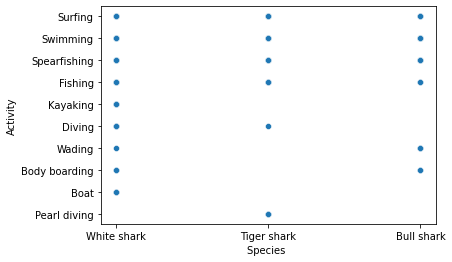

In [17]:
especies_act = lt.df_filtered_best(especies, "Activity", 10)
esp_act = sns.scatterplot(x=especies_act["Species "], y=especies_act["Activity"])
vt.guarda_grafico(esp_act, "images/esp_act.svg")

### Focusing on the main hypotheses of the study, we created graphs to help us explain the results.

## Hypothesis 1
#### Relation between `attacks` and `activity`

I use the `.value_counts()` function to see how many different types of activities there are within the table.

In [18]:
shrk.Activity.value_counts(1)

Surfing                                                                                                                                                  0.168635
Swimming                                                                                                                                                 0.150920
Fishing                                                                                                                                                  0.074852
Spearfishing                                                                                                                                             0.057833
Bathing                                                                                                                                                  0.028135
                                                                                                                                                           ...   
The World Liberty and the ta

There are 1,532 different types of activities. Therefore, we focus on all those that account for more than 1% of the total cases.

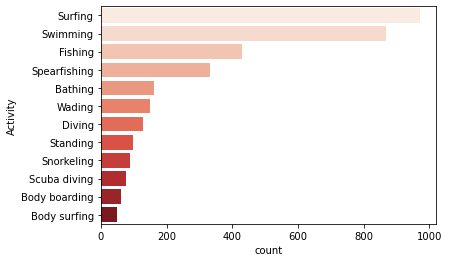

In [19]:
top_act = lt.df_filtered_best(shrk, "Activity", 12)
act_risky = sns.countplot(y=top_act.Activity,palette="Reds")

vt.guarda_grafico(act_risky, "images/act_risky.svg")

AttributeError: 'tuple' object has no attribute 'savefig'

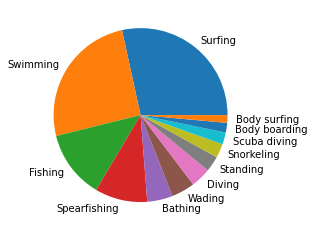

In [49]:
ta = top_act.Activity.value_counts(1)
ta2 = pd.DataFrame(ta)
act_risky_3 = plt.pie(ta2.Activity, labels=ta.index)
act_risky_3.savefig("images/act_risky_2.svg")

#vt.guarda_grafico(act_risky_2,"images/act_risky_2.svg")

This are the most risky activities.

<AxesSubplot:xlabel='Activity', ylabel='count'>

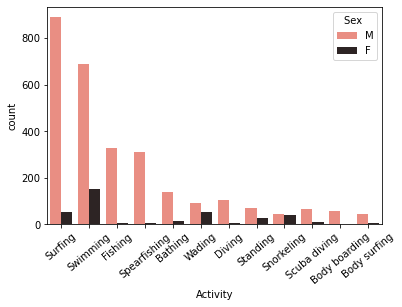

In [30]:
top_act_s = lt.df_filtered_best(top_act, "Sex ", 2)
top_act2 = sns.countplot(x = top_act_s.Activity, hue =top_act_s["Sex "], palette="dark:salmon_r")
top_act2.set_xticklabels(top_act2.get_xticklabels(), rotation=40)
vt.guarda_grafico(top_act2,"images/top_act3.svg")
top_act2

In [22]:
vt.rotar_labels(top_act2,90)
top_act2

<AxesSubplot:xlabel='Activity', ylabel='count'>

From this graph we can deduce that men are more likely to suffer a stroke than women.

The most dangerous activity for men is `Surfing` while `Swimming` is the most risky for women.


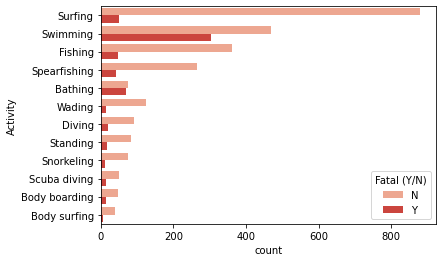

In [26]:
act_pel = lt.df_filtered_best(top_act, "Fatal (Y/N)", 2)
peligro = sns.countplot(y = act_pel.Activity, hue = act_pel["Fatal (Y/N)"], palette="Reds")


In [27]:
vt.guarda_grafico(peligro, "images/peligro.svg")

In [46]:
act_pel2 = act_pel[act_pel["Activity"] == "Fishing"]
act_pel2["Fatal (Y/N)"].value_counts(1)

N    0.885086
Y    0.114914
Name: Fatal (Y/N), dtype: float64

In [43]:
act_pel3 = act_pel[act_pel["Fatal (Y/N)"] == "Y"]
act_pel3["Activity"].value_counts()

Swimming         304
Bathing           70
Surfing           49
Fishing           47
Spearfishing      41
Diving            19
Standing          16
Body boarding     14
Wading            13
Scuba diving      13
Snorkeling        11
Body surfing       6
Name: Activity, dtype: int64

## Hypothesis 2
#### How many `researchers` there are and how much research they have carried out. Is there a shark attack specialist?

In [156]:
shrk["Investigator or Source"].unique()

array(['R. Collier, GSAF', 'K.McMurray, TrackingSharks.com',
       'B. Myatt, GSAF', ..., 'F. Schwartz, p.23; C. Creswell, GSAF',
       'The Sun, 10/20/1938', 'S.W. Baker'], dtype=object)

In [144]:
a = shrk["Investigator or Source"].value_counts()
a[:32]


C. Moore, GSAF                                     105
C. Creswell, GSAF                                   92
S. Petersohn, GSAF                                  82
R. Collier                                          55
R. Collier, GSAF                                    48
T. Peake, GSAF                                      48
M. Levine, GSAF                                     45
A. Gifford, GSAF                                    28
C. Moore. GSAF                                      27
B. Myatt, GSAF                                      26
GSAF                                                23
M. Vorenberg, GSAF                                  20
E. Pace, FSAF                                       20
G. Van Grevelynghe                                  19
E. Ritter, GSAF                                     19
JCOnline                                            16
W. Leander                                          14
J. Green, p.36                                      14
C. Johanss

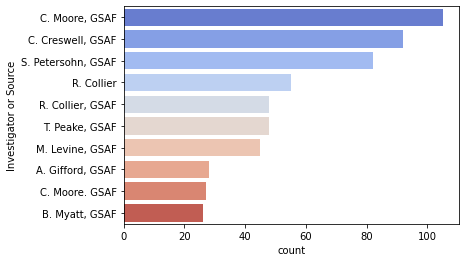

In [140]:
top_invest = lt.df_filtered_best(shrk, "Investigator or Source", 10)
invest = sns.countplot(y=top_invest["Investigator or Source"], palette="coolwarm")
vt.guarda_grafico(invest, "images/invest.svg")

In [184]:

shrk["Invest"]=shrk["Investigator or Source"].str.extract(r'(Moore)')
moore = shrk[shrk["Invest"] == "Moore"]
moore.head(3)

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href,Invest
136,136,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,Moore
2694,2694,1989.02.02,02-Feb-1989,1989.0,Unprovoked,ITALY,Tyrrhenian Sea,"Golfo di Baratti, near Piombino (Tuscany)","Scuba diving, but swimming on surface",Luciano Costanzo,M,47,FATAL. His body not recovered,Y,10h25,6 m [20'] white shark,"A. De Maddalena; Cappelletti (1989a), Bertucce...",http://sharkattackfile.net/spreadsheets/pdf_di...,Moore
2718,2718,1988.08.22.a,22-Aug-1988,1988.0,Unprovoked,ITALY,Manfredonia,Ippocampo,NaN,male,M,16,Survived,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,Moore


In [186]:
moore.Country.value_counts(1)

ITALY              0.213415
SPAIN              0.152439
CROATIA            0.146341
TURKEY             0.073171
ENGLAND            0.054878
GREECE             0.054878
EGYPT              0.036585
ISRAEL             0.030488
FRANCE             0.030488
UNITED KINGDOM     0.024390
USA                0.012195
TOBAGO             0.012195
PORTUGAL           0.012195
CAPE VERDE         0.012195
GUYANA             0.006098
LEBANON            0.006098
ALGERIA            0.006098
SYRIA              0.006098
MONTENEGRO         0.006098
MARTINIQUE         0.006098
SWEDEN             0.006098
AUSTRALIA          0.006098
MEXICO             0.006098
CRETE              0.006098
REUNION ISLAND     0.006098
SCOTLAND           0.006098
NORWAY             0.006098
ITALY / CROATIA    0.006098
INDONESIA          0.006098
TUNISIA            0.006098
MALTA              0.006098
AZORES             0.006098
CHINA              0.006098
ROATAN             0.006098
THE BALKANS        0.006098
PHILIPPINES        0

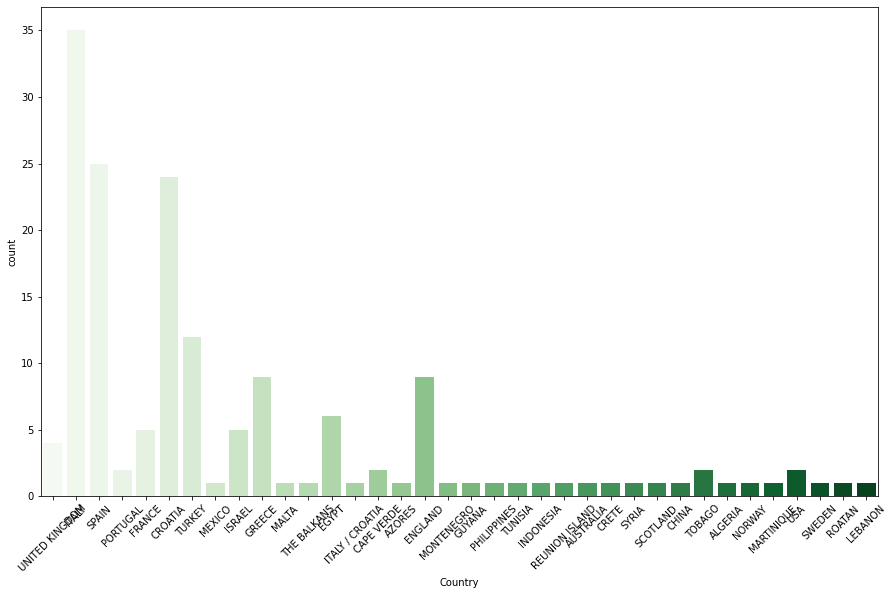

In [183]:
plt.figure(figsize=(15,9))
           
moore_pais=sns.countplot(x = moore.Country, palette="Greens")
vt.rotar_labels(moore_pais,45)
vt.guarda_grafico(moore_pais, "images/moore_pais.svg")

In [242]:

shrk["Invest"]=shrk["Investigator or Source"].str.extract(r'(Creswell)')
cresw= shrk[shrk["Invest"] == "Creswell"]
cresw.head(3)

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href,Invest
11,11,2018.05.21,21-May-2018,2018.0,Unprovoked,USA,South Carolina,"Isle of Palms, Charleston County",Boogie boarding,Trey de Boer,M,10,Injuries to lower right leg and foot,N,NaN,NaN,"C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,Creswell
12,12,2018.05.13.b,13-May-2018,2018.0,Unprovoked,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Jei Turrell,M,10,Severe bite to right forearm,N,15h00,NaN,"C. Creswell, GSAF & K. McMurray TrackingSharks...",http://sharkattackfile.net/spreadsheets/pdf_di...,Creswell
102,102,2017.08.10,10-Aug-2017,2017.0,Unprovoked,USA,South Carolina,"Sea Pines Resort, Hilton Head Island, Beaufort...",Swimming,Linton Suttle,M,13,Minor cuts to sole & toes of left foot,N,13h30,Possibly a juvenile blacktip shark,"C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,Creswell


In [250]:
cresw.Country.value_counts(1)

USA             0.981818
SCOTLAND        0.006061
NEW ZEALAND     0.006061
SOUTH AFRICA    0.006061
Name: Country, dtype: float64

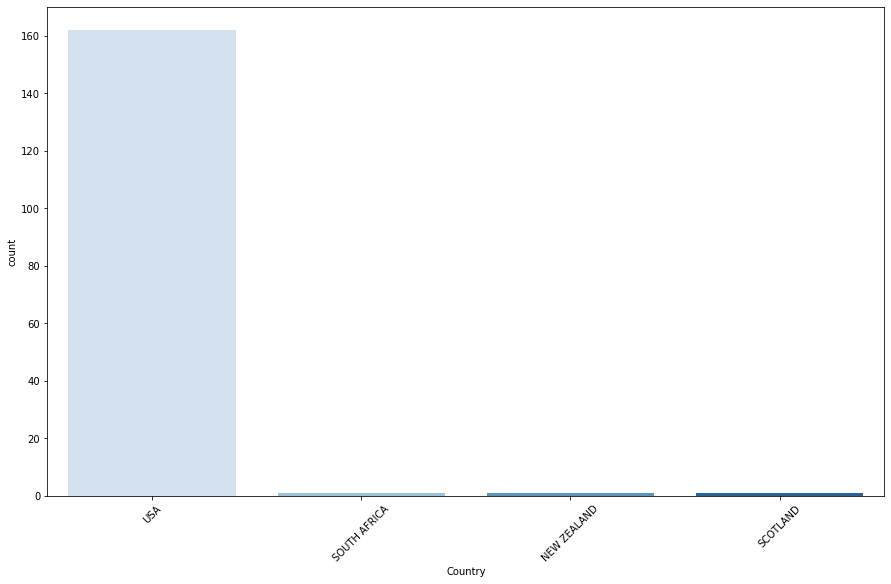

In [251]:
plt.figure(figsize=(15,9))
           
cresw_pais=sns.countplot(x = cresw.Country, palette="Blues")
vt.rotar_labels(cresw_pais,45)
vt.guarda_grafico(cresw_pais, "images/cresw_pais.svg")

In [187]:
moore.Activity.value_counts(1)

Swimming                                                     0.338346
Fishing                                                      0.233083
Bathing                                                      0.045113
Spearfishing                                                 0.045113
Scuba diving                                                 0.030075
Fishing boat                                                 0.022556
Diving for sponges                                           0.015038
Diving                                                       0.015038
Fishing for squid                                            0.015038
Skin diving                                                  0.015038
Longling fishing                                             0.007519
Scuba diving, but swimming on surface                        0.007519
Diving (Helmet) for sponges                                  0.007519
Fishing for mackerel                                         0.007519
Fell overboard      

In [262]:
cresw.Activity.value_counts(1)

Swimming                                                                0.255034
Surfing                                                                 0.147651
Wading                                                                  0.107383
Standing                                                                0.067114
Fishing                                                                 0.060403
Body surfing                                                            0.046980
Boogie boarding                                                         0.040268
Bathing                                                                 0.033557
Boogie Boarding                                                         0.026846
Diving                                                                  0.020134
Floating                                                                0.013423
Playing                                                                 0.013423
Playing in the surf         

In [260]:
moore.head(3)

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href,Invest
136,136,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,Moore
2694,2694,1989.02.02,02-Feb-1989,1989.0,Unprovoked,ITALY,Tyrrhenian Sea,"Golfo di Baratti, near Piombino (Tuscany)","Scuba diving, but swimming on surface",Luciano Costanzo,M,47,FATAL. His body not recovered,Y,10h25,6 m [20'] white shark,"A. De Maddalena; Cappelletti (1989a), Bertucce...",http://sharkattackfile.net/spreadsheets/pdf_di...,Moore
2718,2718,1988.08.22.a,22-Aug-1988,1988.0,Unprovoked,ITALY,Manfredonia,Ippocampo,NaN,male,M,16,Survived,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,Moore


Filtramos los datos para ver cuantas investigaciones ha llevado a cabo a lo largo de los años.

In [ ]:
moore2 = moore[moore["Year"]>1600]
moore_year=sns.histplot(x=moore2["Year"], kde=True, color="green")
vt.guarda_grafico(moore_year, "images/moore_year.svg")

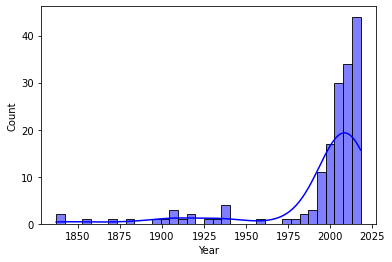

In [259]:
cresw2 = cresw[cresw["Year"]>1600]
cresw_year=sns.histplot(x=cresw2["Year"], kde=True, color="blue")
vt.guarda_grafico(cresw_year, "images/cresw_year.svg")

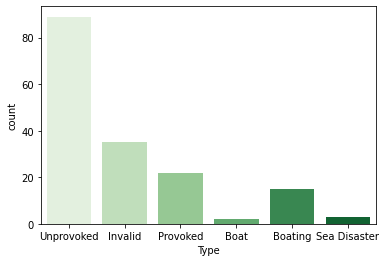

In [221]:
moore_pro=sns.countplot(x=moore.Type, palette="Greens")
vt.guarda_grafico(moore_pro, "images/moore_pro.svg")

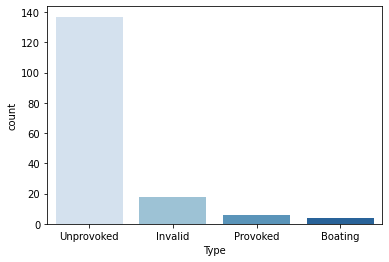

In [263]:
cresw_pro=sns.countplot(x=cresw.Type, palette="Blues")
vt.guarda_grafico(cresw_pro, "images/cresw_pro.svg")

In [219]:
moore2["Type"].value_counts(1)

Unprovoked      0.524691
Invalid         0.216049
Provoked        0.135802
Boating         0.092593
Sea Disaster    0.018519
Boat            0.012346
Name: Type, dtype: float64

In [261]:
cresw2["Type"].value_counts(1)

Unprovoked    0.828221
Invalid       0.110429
Provoked      0.036810
Boating       0.024540
Name: Type, dtype: float64

In [38]:
import src.limpieza_texto as lt

In [190]:
lt.valores_iguales(data_filtered_6, "Investigator or Source", "C. Moore, GSAF")

NameError: name 'data_filtered_6' is not defined

In [64]:
encontrar = r'[(D|d)iving]'
lugar = shrk.Activity
matches = re.findall(encontrar, lugar)

TypeError: expected string or bytes-like object